In [3]:
# loading the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas.util.testing as tm
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [4]:
# loading the dataset 
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
# checking the shape
print('X_train shape - ',X_train.shape)
print('X_test shape - ',X_test.shape)
print('y_train shape - ',y_train.shape)
print('y_test shape - ',y_test.shape)

X_train shape -  (50000, 32, 32, 3)
X_test shape -  (10000, 32, 32, 3)
y_train shape -  (50000, 1)
y_test shape -  (10000, 1)


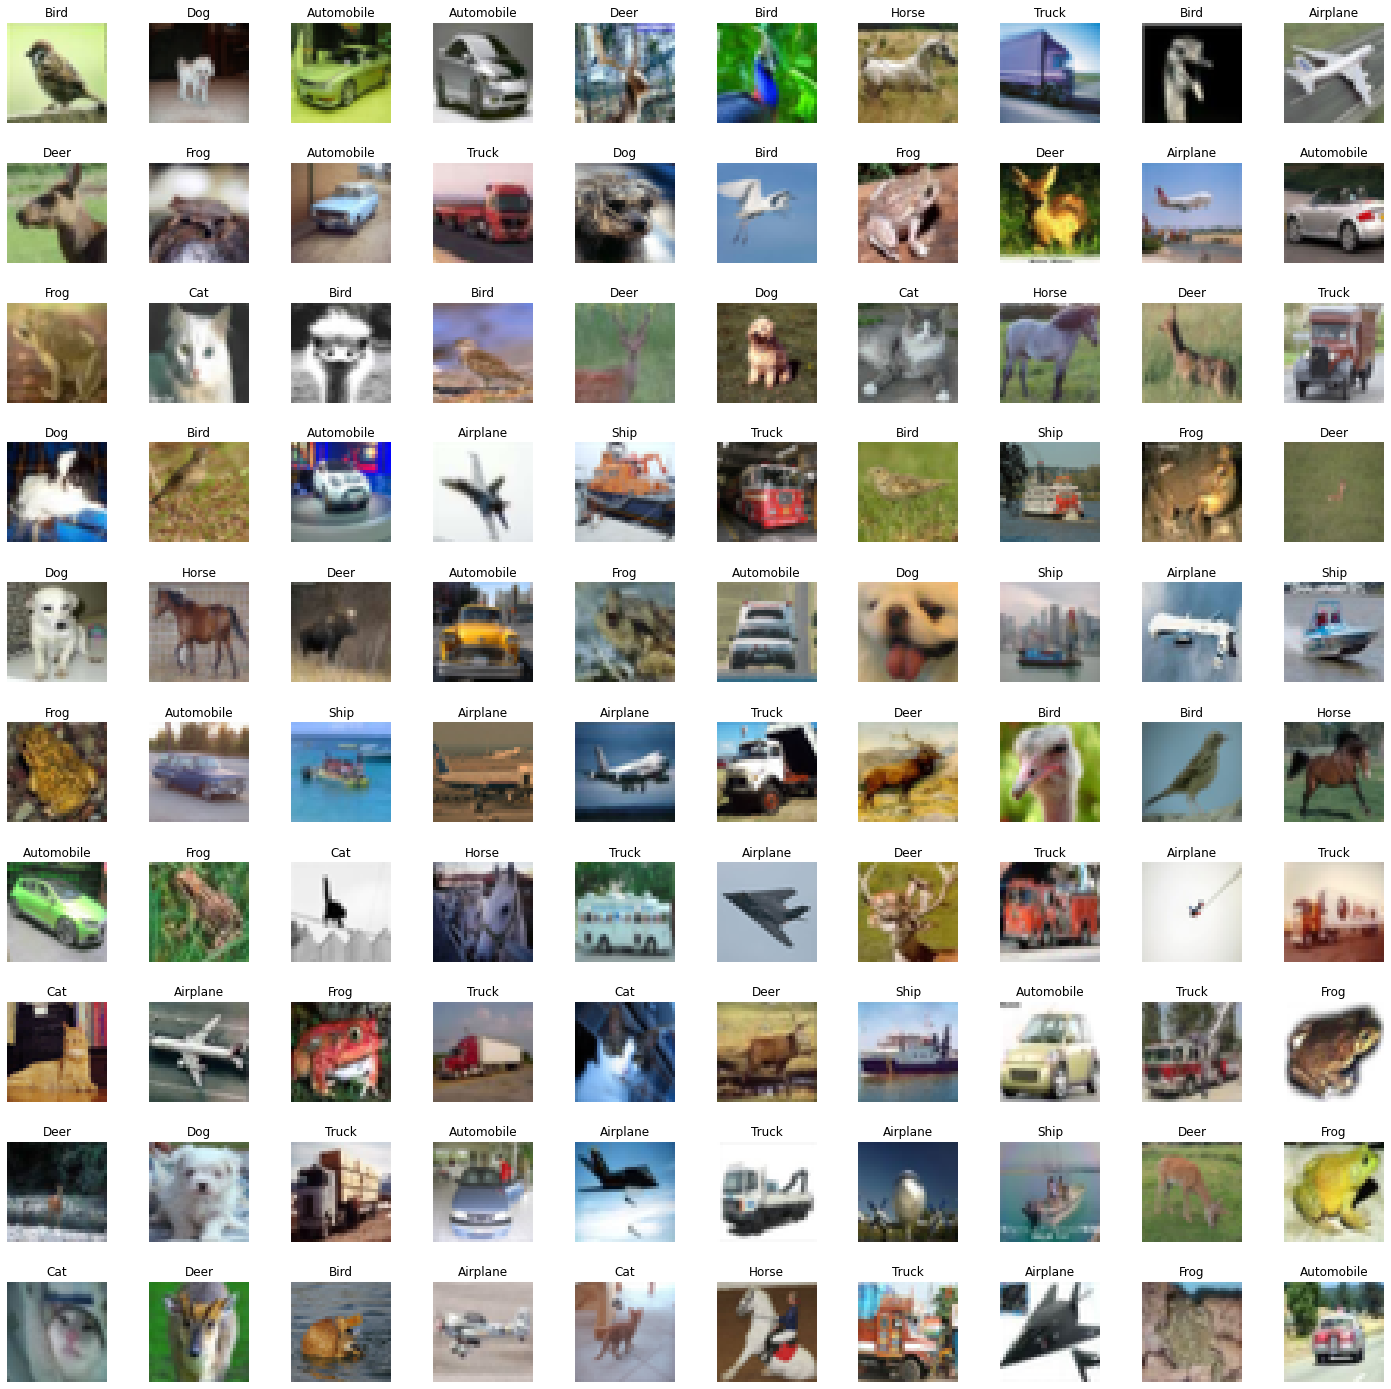

In [6]:
# visualizing few samples

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0,L_grid*W_grid):
    index = np.random.randint(0,n_training) 
    axes[i].imshow(X_train[index])
    index = y_train[index]
    axes[i].set_title(labels[int(index)])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [7]:
# converting the values into float and normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [8]:
# encoding the Predictor variable
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
# Storing the input shape
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [10]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.00055), metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 128)         0

In [13]:
# fitting the train data into the model
history = model.fit(X_train, y_train, batch_size = 64, epochs = 32, shuffle = True,validation_data=(X_test,y_test))

Epoch 1/32
782/782 [==============================] - 6s 8ms/step - loss: 1.5507 - accuracy: 0.4322 - val_loss: 1.2273 - val_accuracy: 0.5606
Epoch 2/32
782/782 [==============================] - 6s 8ms/step - loss: 1.1540 - accuracy: 0.5854 - val_loss: 0.9959 - val_accuracy: 0.6429
Epoch 3/32
782/782 [==============================] - 6s 8ms/step - loss: 0.9735 - accuracy: 0.6545 - val_loss: 0.8516 - val_accuracy: 0.7017
Epoch 4/32
782/782 [==============================] - 6s 8ms/step - loss: 0.8428 - accuracy: 0.7000 - val_loss: 0.7535 - val_accuracy: 0.7378
Epoch 5/32
782/782 [==============================] - 6s 8ms/step - loss: 0.7482 - accuracy: 0.7360 - val_loss: 0.7088 - val_accuracy: 0.7534
Epoch 6/32
782/782 [==============================] - 6s 8ms/step - loss: 0.6770 - accuracy: 0.7608 - val_loss: 0.6984 - val_accuracy: 0.7562
Epoch 7/32
782/782 [==============================] - 6s 8ms/step - loss: 0.6131 - accuracy: 0.7835 - val_loss: 0.6597 - val_accuracy: 0.7734
Epoch 

In [14]:
# Evaluating the model performance
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8914 - accuracy: 0.7987
Test Accuracy: 0.7986999750137329


In [15]:
predicted_classes = model.predict_classes(X_test) 
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 1, 8, ..., 5, 1, 7])

In [16]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

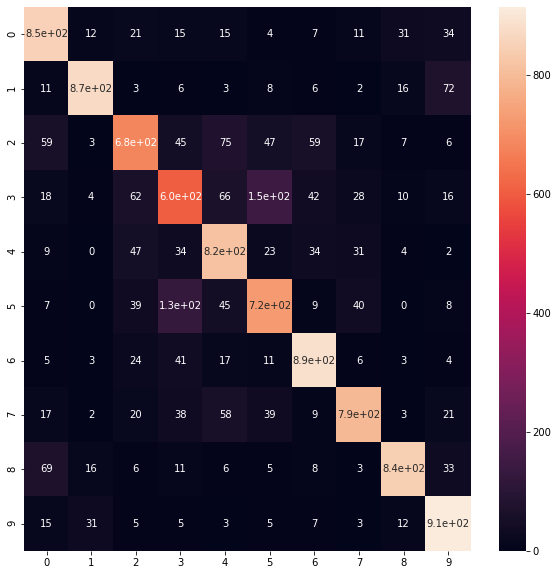

In [17]:
# plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [18]:
# generating more data using the existing data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                             )
datagen.fit(X_train)

In [19]:
# retraining the model

model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64), epochs = 16)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
782/782 [==============================] - 6s 8ms/step - loss: 0.4440 - accuracy: 0.8603
Epoch 2/16
782/782 [==============================] - 6s 8ms/step - loss: 0.3814 - accuracy: 0.8770
Epoch 3/16
782/782 [==============================] - 6s 8ms/step - loss: 0.3544 - accuracy: 0.8830
Epoch 4/16
782/782 [==============================] - 6s 8ms/step - loss: 0.3366 - accuracy: 0.8868
Epoch 5/16
782/782 [==============================] - 6s 8ms/step - loss: 0.3149 - accuracy: 0.8938
Epoch 6/16
782/782 [==============================] - 6s 8ms/step - loss: 0.2954 - accuracy: 0.8996
Epoch 7/16
782/782 [==============================] - 6s 8ms/step - loss: 0.2767 - accuracy: 0.9050
Epoch 8/16
782/782 [==============================] - 6s 8ms/step - loss: 0.2720 - accuracy: 0.9076
Epoch 9/16
782/782 [==============================] - 6s 8ms/step - loss: 0.2638 - accuracy: 0.9088
Epoch 10/16
782/782 [===

In [20]:
# encoding the Predictor variable
y_test = keras.utils.to_categorical(y_test, 10)

In [21]:
# printing the accuracy
score = model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7101 - accuracy: 0.8160
Test accuracy 0.8159999847412109


In [29]:
from keras.models import load_model 
model.save('cifar10_model.h5')

In [31]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [36]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/cat.jfif')
	# load model
	model = load_model('cifar10_model.h5')
	# predict the class
	result = model.predict_classes(img)
	return result[0]

# entry point, run the example
pred = run_example()
labels1 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(labels1[pred])

Cat
